In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import allen_data_fetch

/Users/philipmardoum/Desktop/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


**Cre lines:** 'Cux2-CreERT2', 'Rbp4-Cre', 'Scnn1a-Tg3-Cre', 'Rorb-IRES2-Cre'

**Areas:** 'VISal', 'VISpm', 'VISp', 'VISl'

In [2]:
container_list = allen_data_fetch.get_container_list()

container_list_filt = container_list[(container_list['targeted_structure'] == 'VISp') & 
                                     (container_list['cre_line'] == 'Cux2-CreERT2')]
container_list_filt

# container_list_filt = container_list[(container_list['targeted_structure'] == 'VISl') |
#                                      (container_list['targeted_structure'] == 'VISal')]

# container_list_filt = container_list[(container_list['targeted_structure'] == 'VISl')]
# container_list_filt

# container_list_grouped = container_list_filt.groupby(['targeted_structure', 'cre_line'])
# list(container_list_filt['id'].groupby(container_list_filt['cre_line']))

,age_days,cre_line,id,imaging_depth,targeted_structure
3,152.0,Cux2-CreERT2,511510736,175,VISp
8,111.0,Cux2-CreERT2,511510884,175,VISp
17,144.0,Cux2-CreERT2,511510667,275,VISp
24,113.0,Cux2-CreERT2,511510855,175,VISp
25,143.0,Cux2-CreERT2,511510650,175,VISp
39,144.0,Cux2-CreERT2,511509529,175,VISp
41,143.0,Cux2-CreERT2,511510927,275,VISp
47,124.0,Cux2-CreERT2,511510670,175,VISp
55,156.0,Cux2-CreERT2,511507650,175,VISp
61,99.0,Cux2-CreERT2,511510718,175,VISp


In [17]:
container_id = container_list_filt['id'].values[2]

In [18]:
activity_matrix_1 = allen_data_fetch.get_activity_matrix(
    container_id=container_id, session_idx=0, stim_type='drifting_gratings', units='all', trace_type='dff')
activity_matrix_2 = allen_data_fetch.get_activity_matrix(
    container_id=container_id, session_idx=0, stim_type='natural_movie_three_2', units='all', trace_type='dff')

# activity_matrix_1, activity_matrix_2 = allen_data_fetch.split_activity_matrix(activity_matrix_1)

Experiment container info:
[{'targeted_structure': u'VISp', 'imaging_depth': 275, 'age_days': 144.0, 'id': 511510667, 'cre_line': u'Cux2-CreERT2'}]
Stimuli in selected session:
[u'drifting_gratings', u'natural_movie_one', u'natural_movie_three', u'spontaneous']

Experiment container info:
[{'targeted_structure': u'VISp', 'imaging_depth': 275, 'age_days': 144.0, 'id': 511510667, 'cre_line': u'Cux2-CreERT2'}]
Stimuli in selected session:
[u'drifting_gratings', u'natural_movie_one', u'natural_movie_three', u'spontaneous']



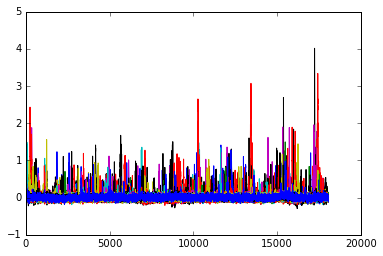

In [24]:
# for i in range(50):
#     plt.plot(activity_matrix_1[:,i])

In [20]:
# for i in range(50):
#     plt.plot(activity_matrix_2[:,i])

In [21]:
import cobra_analysis

pop_coupling_strengths_1 = cobra_analysis.pop_corr_z_scored(activity_matrix_1)
pop_coupling_strengths_2 = cobra_analysis.pop_corr_z_scored(activity_matrix_2)

# pop_coupling_strengths_1 = cobra_analysis.pop_corr(activity_matrix_1)
# pop_coupling_strengths_2 = cobra_analysis.pop_corr(activity_matrix_2)

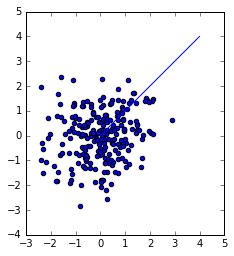

In [22]:
fig, ax = plt.subplots()
ax.scatter(pop_coupling_strengths_1, pop_coupling_strengths_2)

plt.plot(range(5))
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

In [23]:
pop_coupling_strengths_1.shape

(243, 1)